In [ ]:
# Importar librerías necesarias
import pandas as pd
from google.colab import files

# Subir el archivo de la base de datos manualmente en Google Colab
print("Sube tu archivo Excel:")
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Cargar el archivo Excel
xls = pd.ExcelFile(file_name)

# Mostrar las hojas disponibles en el archivo
print("Hojas disponibles en el archivo:", xls.sheet_names)

# Cargar la hoja correcta de la base de datos
df = pd.read_excel("/content/BASE DE DATOS FINAL TFG EBAY DEFINITIVA.xlsx")  # Asegúrate de cambiar el nombre si la hoja es diferente

#   Identificación de Tipos de Variables
variable_info = pd.DataFrame({
    "Variable": df.columns,
    "Tipo de Dato": df.dtypes.values,
    "Valores Únicos": [df[col].nunique() for col in df.columns]
})

#   Clasificación de Variables por Naturaleza
def classify_variable(column):
    unique_values = df[column].nunique()
    dtype = df[column].dtype

    if dtype == 'object':
        return "Categórica"
    elif unique_values == 2:
        return "Binaria"
    elif dtype in ['int64', 'float64']:
        return "Discreta" if unique_values < 20 else "Continua"
    else:
        return "Desconocida"

variable_info["Naturaleza"] = variable_info["Variable"].apply(classify_variable)

#   Mostrar la información de las variables
print(" Información de Variables en la Base de Datos:")
print(variable_info)

# Guardar la información en un archivo Excel y descargarlo automáticamente
variable_info.to_excel("Tipos_de_Variables.xlsx", index=False)
print("\nArchivo guardado como 'Tipos_de_Variables.xlsx'")

files.download("Tipos_de_Variables.xlsx")


Sube tu archivo Excel:


Saving BASE DE DATOS FINAL TFG EBAY DEFINITIVA.xlsx to BASE DE DATOS FINAL TFG EBAY DEFINITIVA (1).xlsx
Hojas disponibles en el archivo: ['Sheet1']

📌 Información de Variables en la Base de Datos:
                       Variable Tipo de Dato  Valores Únicos  Naturaleza
0                        Nombre       object              90  Categórica
1                        Precio      float64            3723    Continua
2             Unidades Vendidas        int64             584    Continua
3              Valoración (1-5)      float64              16    Discreta
4           Número de Opiniones        int64             317    Continua
5   Tiempo en el Mercado (días)        int64             700    Continua
6        Descuento Aplicado (%)        int64              27    Continua
7              Stock Disponible        int64            1205    Continua
8                   Electronics        int64               2     Binaria
9         Automotive Accesories        int64               2     Binaria


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd


# Filtrar columnas que representen categorías binarias
categorias_binarias = [col for col in df.columns if col.startswith("Categoria_")]

# Calcular la suma total de unidades vendidas por cada categoría
ventas_por_categoria = {}

for categoria in categorias_binarias:
    total_ventas = df[df[categoria] == 1]["Unidades Vendidas"].sum()
    ventas_por_categoria[categoria] = total_ventas

# Convertir a DataFrame para visualizar
ventas_categoria_df = pd.DataFrame.from_dict(ventas_por_categoria, orient='index', columns=["Unidades Vendidas"])
ventas_categoria_df = ventas_categoria_df.sort_values(by="Unidades Vendidas", ascending=False)

# Mostrar resultado
print(ventas_categoria_df)

# Opcional: gráfico de barras
import matplotlib.pyplot as plt

ventas_categoria_df.plot(kind='bar', figsize=(10,6), legend=False)
plt.title("Unidades Vendidas por Categoría")
plt.ylabel("Unidades Vendidas")
plt.xlabel("Categoría")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Empty DataFrame
Columns: [Unidades Vendidas]
Index: []


TypeError: no numeric data to plot

In [ ]:
# Importar librerías necesarias
import pandas as pd
from google.colab import files



#   Calcular Media, Mediana y Moda para variables numéricas
statistics = pd.DataFrame({
    "Variable": df.select_dtypes(include=['number']).columns,
    "Media": df.select_dtypes(include=['number']).mean().values,
    "Mediana": df.select_dtypes(include=['number']).median().values,
    "Moda": [df[col].mode()[0] for col in df.select_dtypes(include=['number']).columns]
})

#   Mostrar los resultados
print(" Estadísticas (Media, Mediana y Moda) de Variables Numéricas:")
print(statistics)





📌 Estadísticas (Media, Mediana y Moda) de Variables Numéricas:
                       Variable       Media  Mediana   Moda
0                        Precio   33.854879     23.5   23.5
1                Disponibilidad    1.000000      1.0    1.0
2             Unidades Vendidas  202.203061    177.0  177.0
3              Valoración (1-5)    4.246794      4.2    4.2
4           Número de Opiniones   54.564975     36.0    5.0
5   Tiempo en el Mercado (días)  241.534629    223.0  341.0
6        Descuento Aplicado (%)    5.605652      0.0    0.0
7              Stock Disponible  360.427799    296.0  296.0
8                   Electronics    0.067116      0.0    0.0
9         Automotive Accesories    0.066795      0.0    0.0
10                         Toys    0.066795      0.0    0.0
11                     Clothing    0.066367      0.0    0.0
12                   Home Decor    0.066367      0.0    0.0
13             Sports Equipment    0.066795      0.0    0.0
14                        Books    0


📌 Medidas de Dispersión:
                       Variable      Varianza  Desviación Estándar     Rango  \
0                        Precio   1289.585750            35.910803   170.195   
1                Disponibilidad      0.000000             0.000000     0.000   
2             Unidades Vendidas  20162.854230           141.995966   653.000   
3              Valoración (1-5)      0.189031             0.434776     1.500   
4           Número de Opiniones   2805.379870            52.965837   458.000   
5   Tiempo en el Mercado (días)  22004.516651           148.339195   700.000   
6        Descuento Aplicado (%)     84.826015             9.210104    30.000   
7              Stock Disponible  83967.744773           289.771884  1210.000   
8                   Electronics      0.062615             0.250230     1.000   
9         Automotive Accesories      0.062337             0.249674     1.000   
10                         Toys      0.062337             0.249674     1.000   
11            

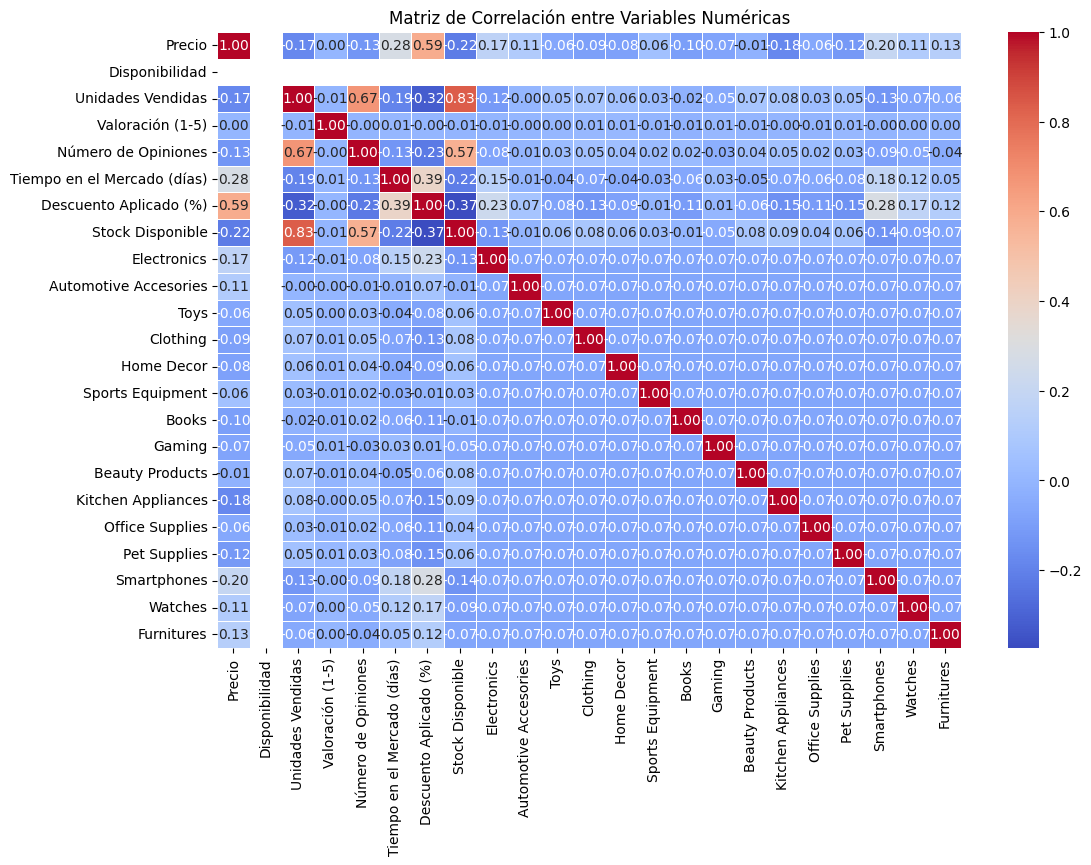

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files



#  Calcular Medidas de Dispersión y Asociación

# Seleccionar solo variables numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular medidas de dispersión
dispersion_measures = pd.DataFrame({
    "Variable": numerical_df.columns,
    "Varianza": numerical_df.var().values,
    "Desviación Estándar": numerical_df.std().values,
    "Rango": (numerical_df.max() - numerical_df.min()).values,
    "Coeficiente de Variación (%)": (numerical_df.std() / numerical_df.mean() * 100).values
})

# Calcular Matriz de Correlación
correlation_matrix = numerical_df.corr()

#   Mostrar Resultados
print(" Medidas de Dispersión:")
print(dispersion_measures)

print(" Matriz de Correlación:")
print(correlation_matrix)

# Graficar la Matriz de Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()




/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)



📌 Medidas de Forma: Curtosis y Asimetría
                       Variable   Curtosis  Asimetría
0                        Precio   2.950659   1.880655
1                Disponibilidad        NaN        NaN
2             Unidades Vendidas  -0.702057   0.554773
3              Valoración (1-5)  -1.171527   0.010714
4           Número de Opiniones   3.879100   1.696492
5   Tiempo en el Mercado (días)   1.175943   1.074638
6        Descuento Aplicado (%)   0.377200   1.364462
7              Stock Disponible   0.091931   0.939153
8                   Electronics   9.971466   3.459981
9         Automotive Accesories  10.042730   3.470264
10                         Toys  10.042730   3.470264
11                     Clothing  10.138827   3.484082
12                   Home Decor  10.138827   3.484082
13             Sports Equipment  10.042730   3.470264
14                        Books  10.042730   3.470264
15                       Gaming  10.078621   3.475431
16              Beauty Products  10.0906

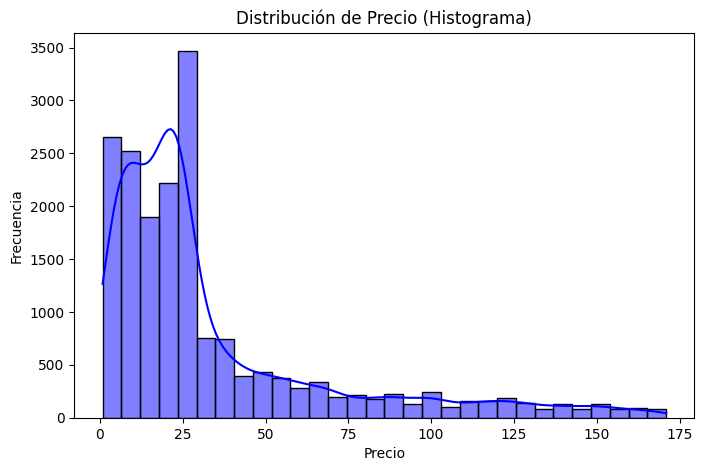

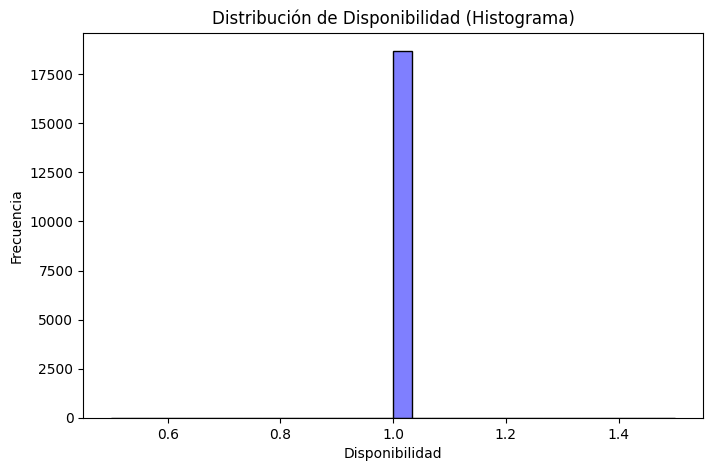

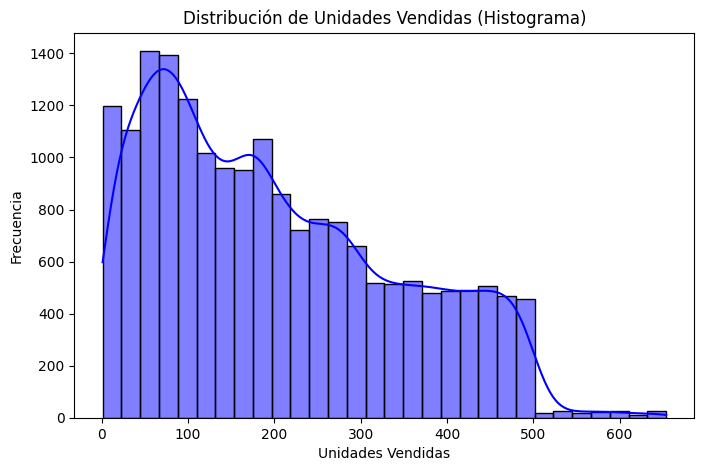

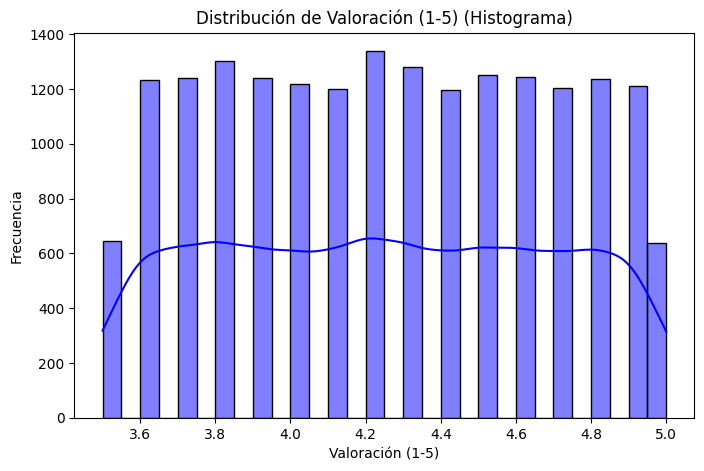

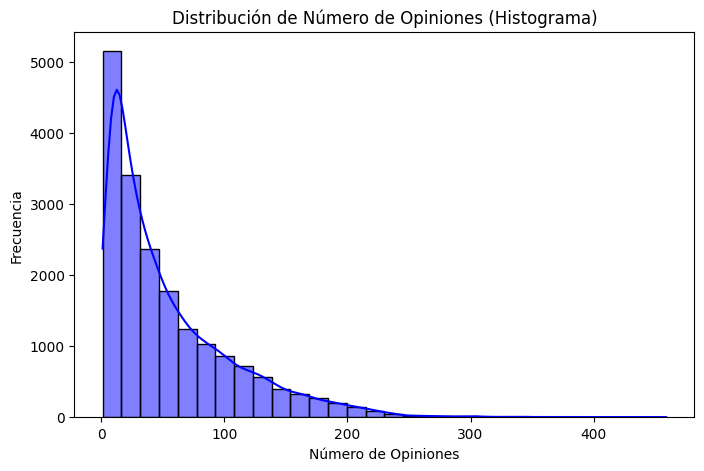

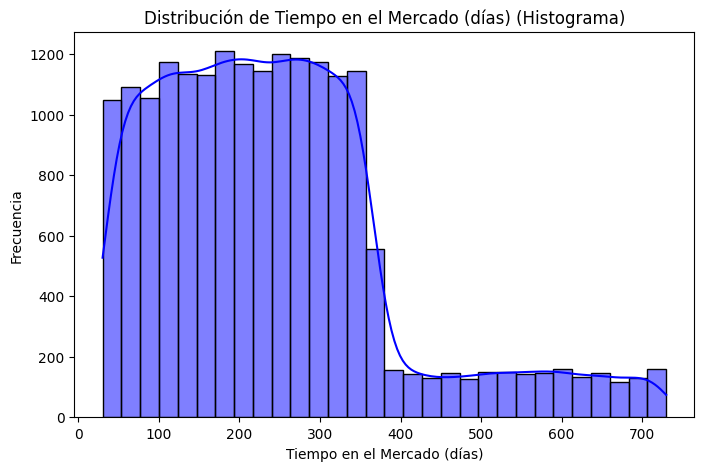

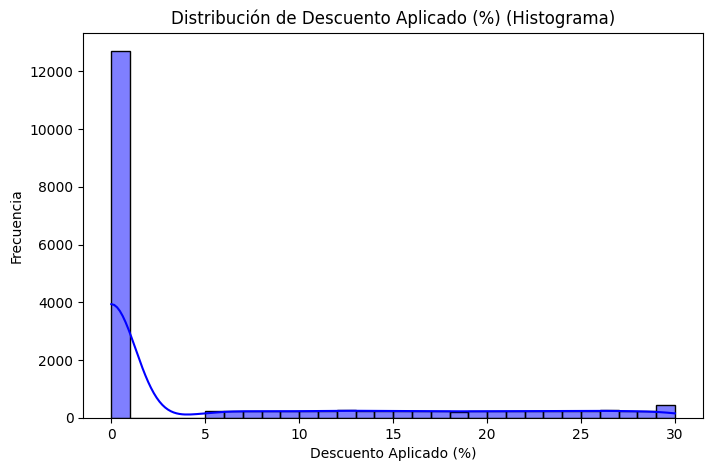

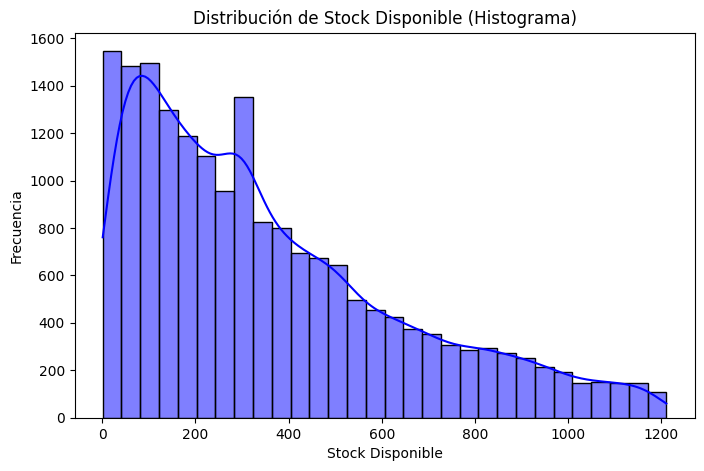

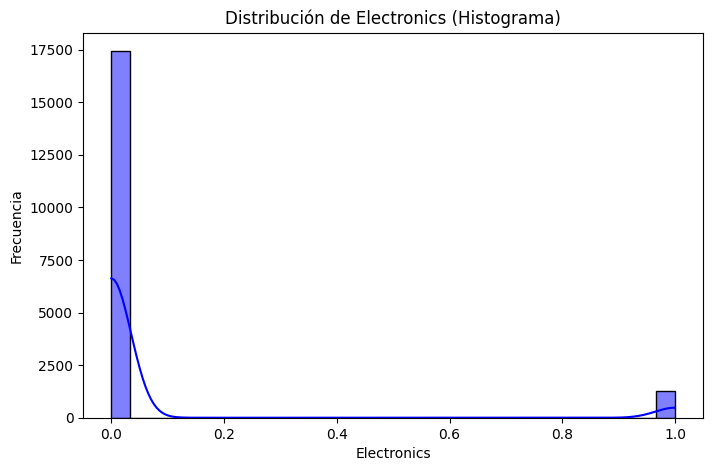

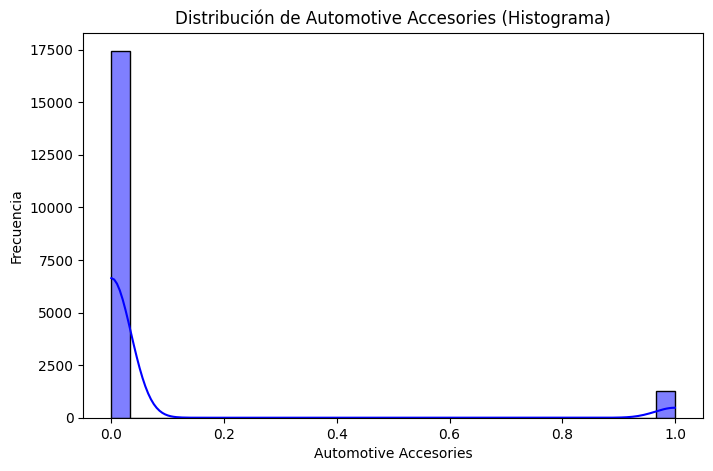

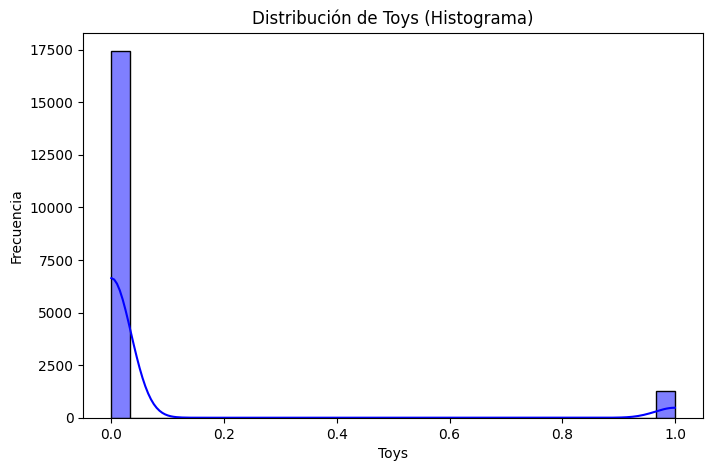

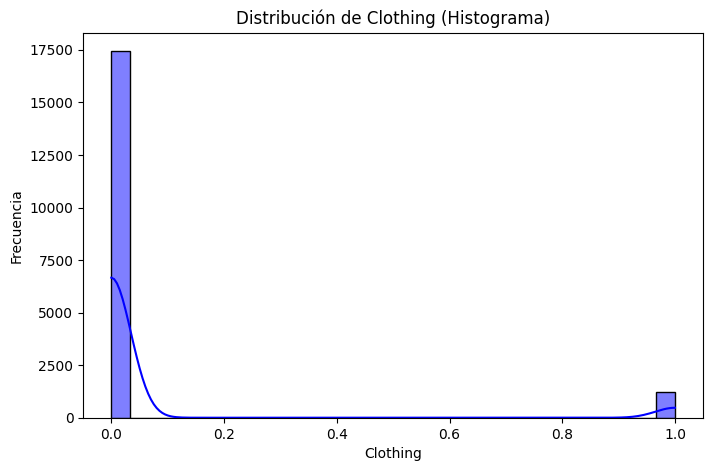

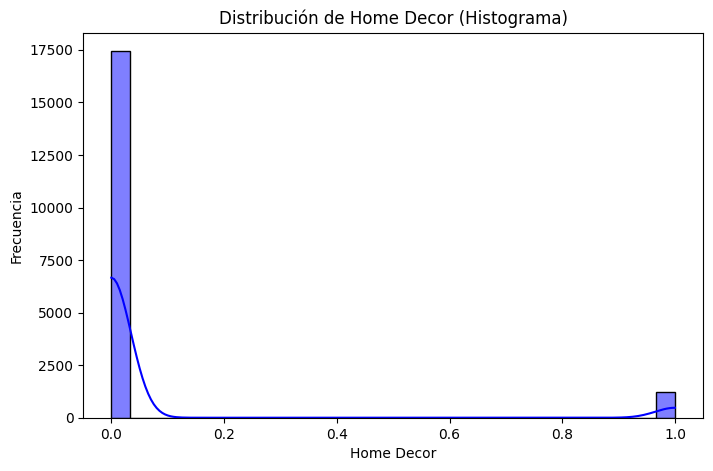

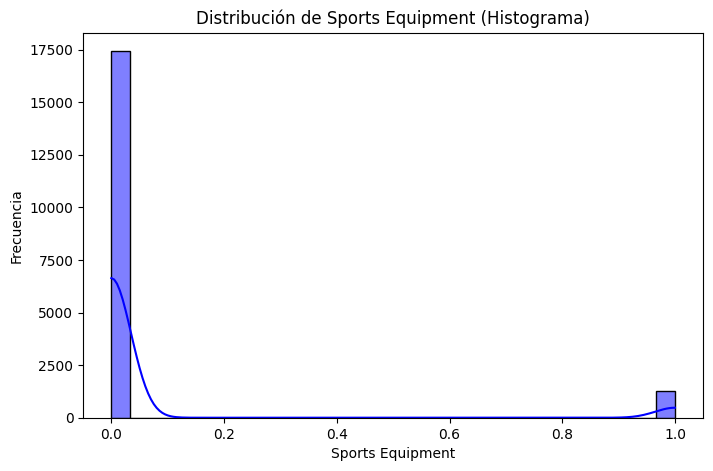

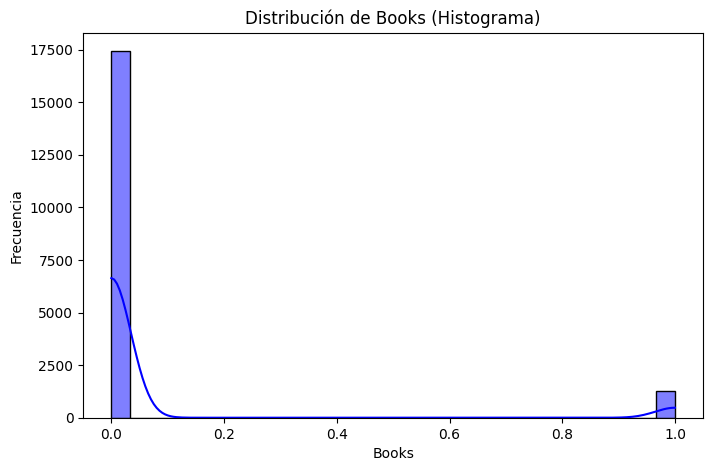

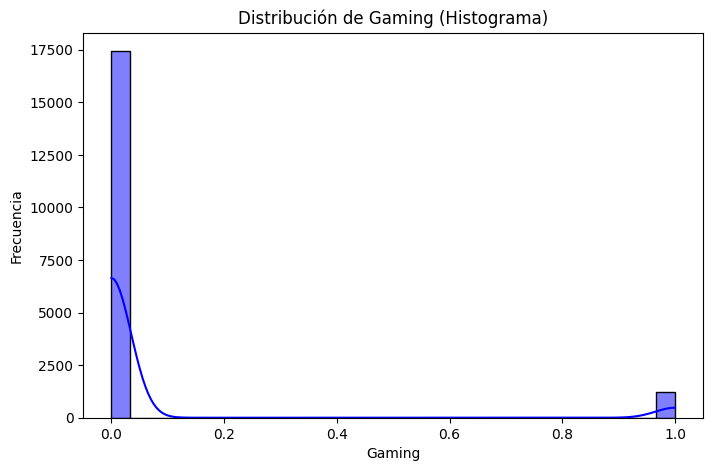

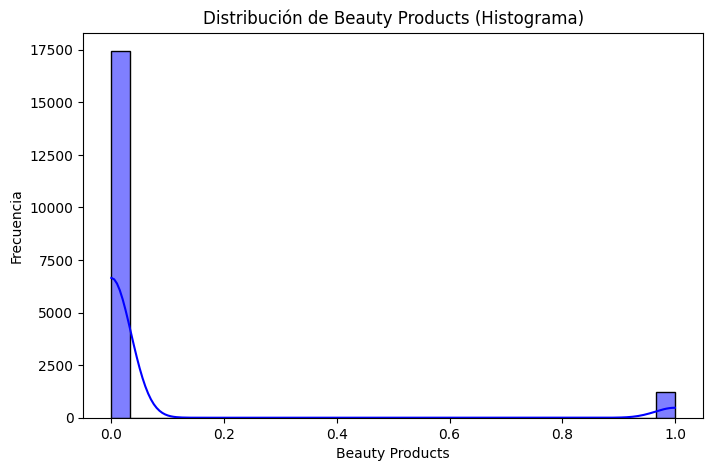

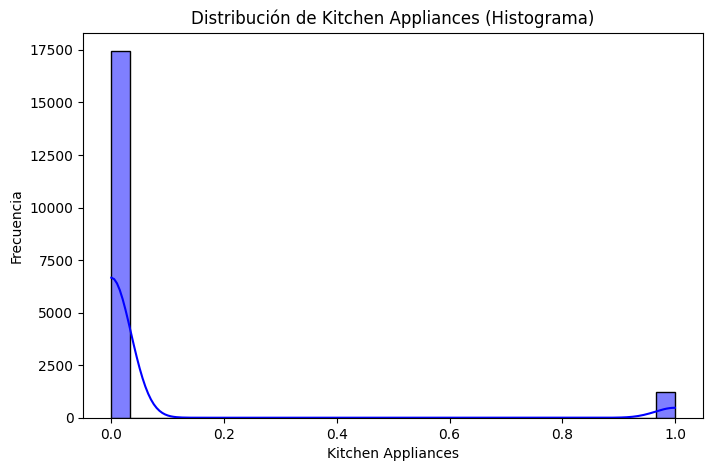

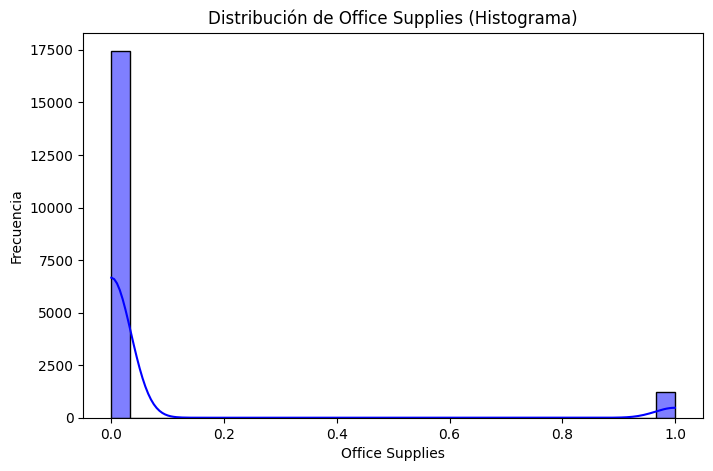

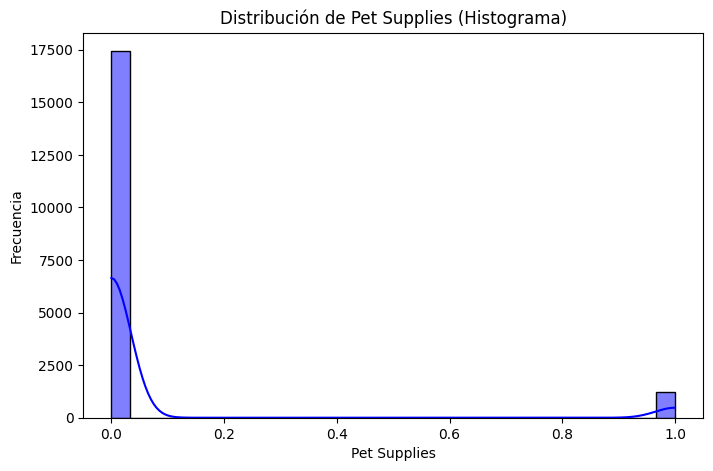

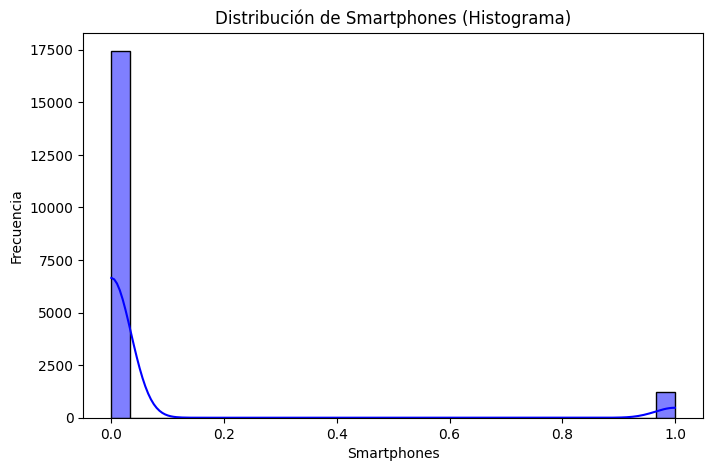

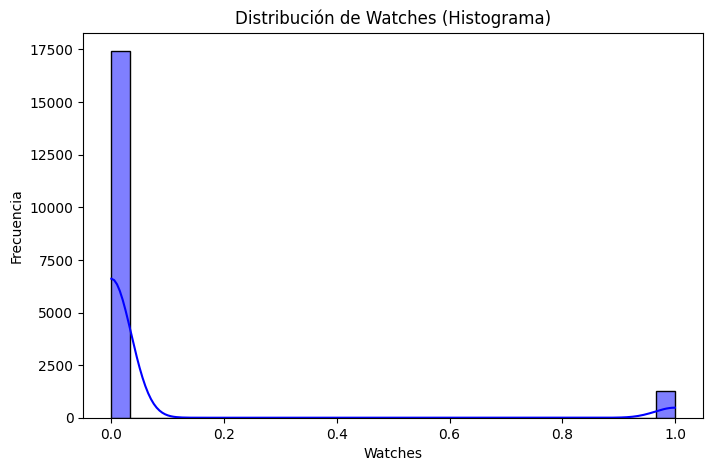

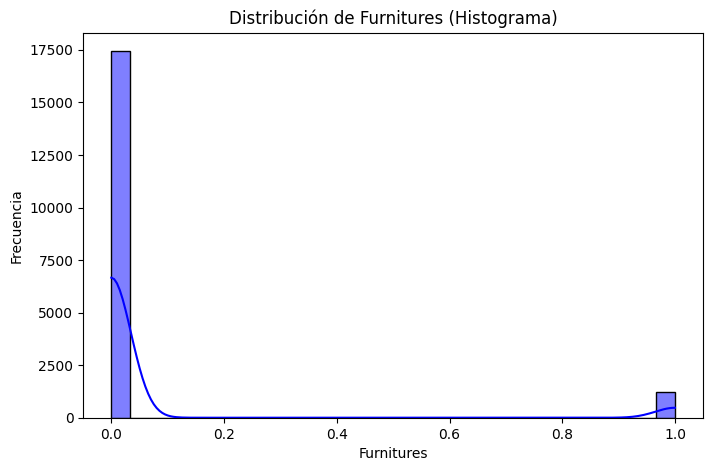

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from google.colab import files



#  Calcular Curtosis y Asimetría para variables numéricas
numerical_df = df.select_dtypes(include=['number'])

# Crear DataFrame con los valores de curtosis y asimetría
shape_measures = pd.DataFrame({
    "Variable": numerical_df.columns,
    "Curtosis": numerical_df.apply(kurtosis).values,
    "Asimetría": numerical_df.apply(skew).values
})

#   Mostrar los resultados
print(" Medidas de Forma: Curtosis y Asimetría")
print(shape_measures)

# Graficar histogramas para visualizar asimetría
for col in numerical_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numerical_df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribución de {col} (Histograma)")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()




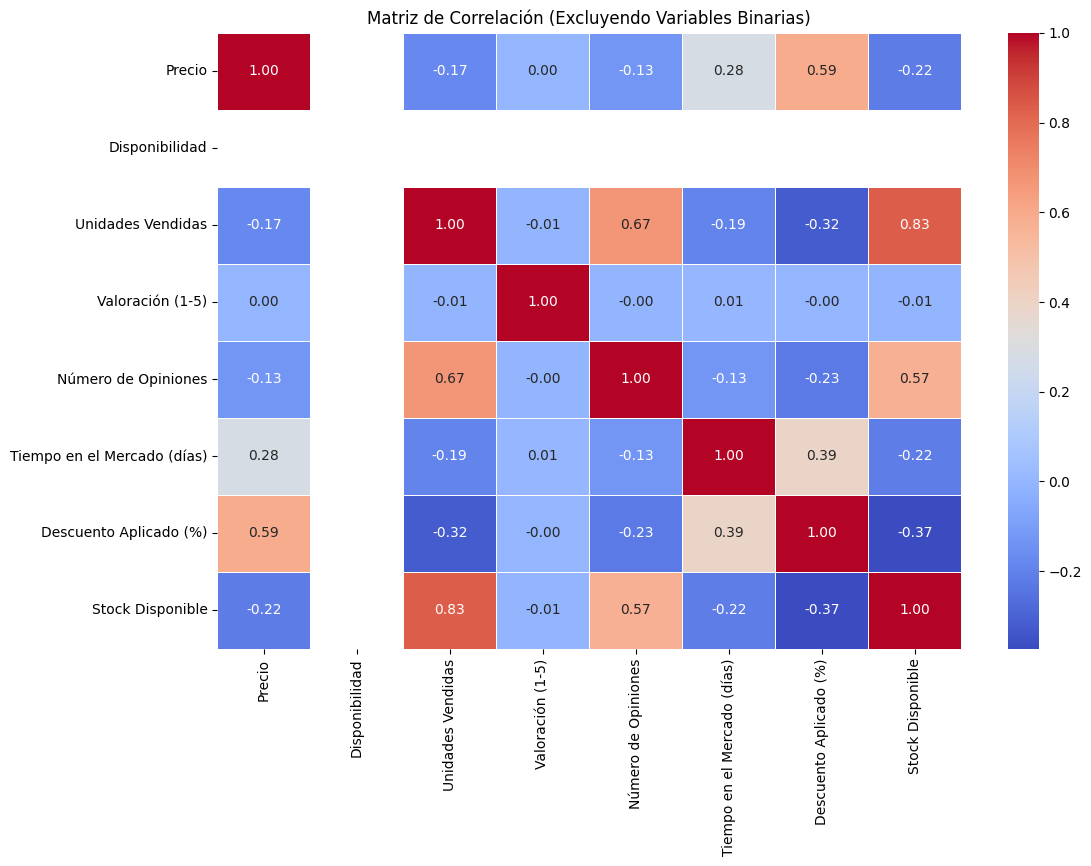

In [ ]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


#   Excluir variables binarias
# Seleccionar solo variables numéricas que NO sean binarias (0 y 1)
numerical_df = df.select_dtypes(include=['number'])
binary_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() == 2]
filtered_df = numerical_df.drop(columns=binary_columns)

#   Calcular Matriz de Correlación sin variables binarias
correlation_matrix = filtered_df.corr()

#   Graficar la Matriz de Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Excluyendo Variables Binarias)")
plt.show()




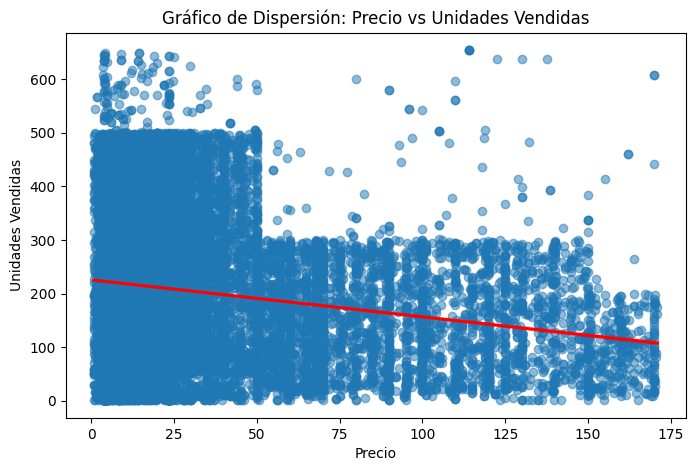

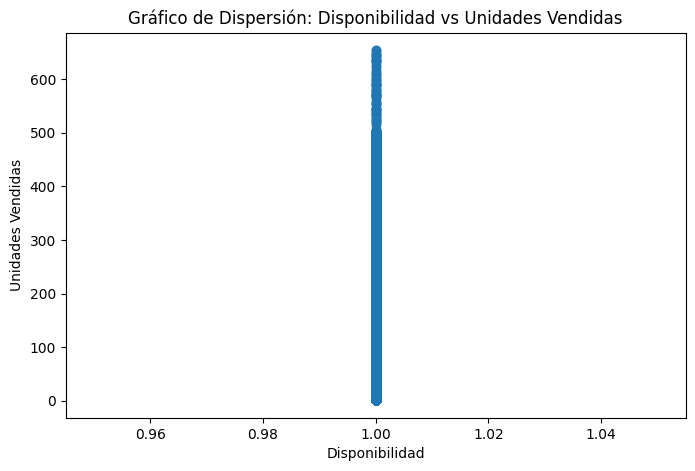

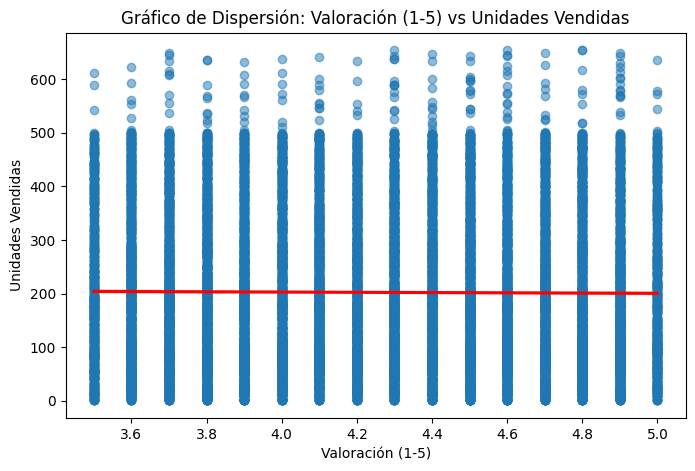

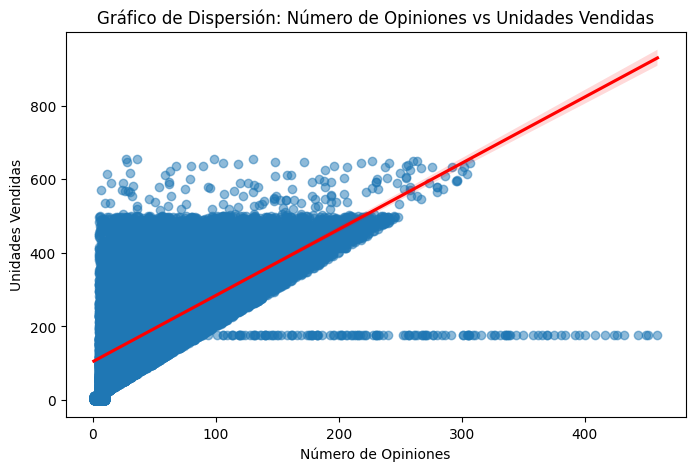

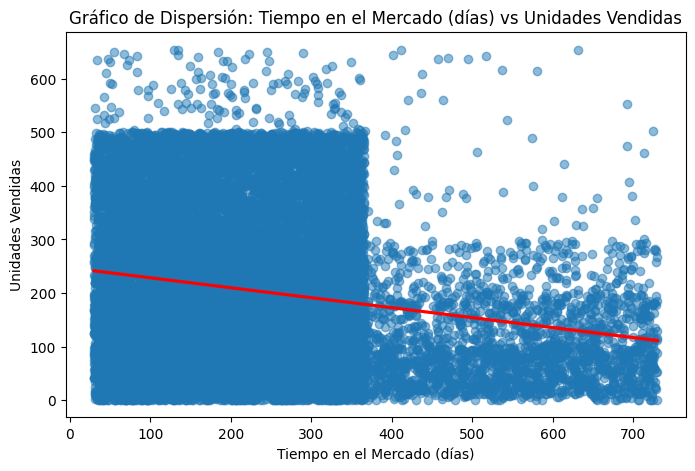

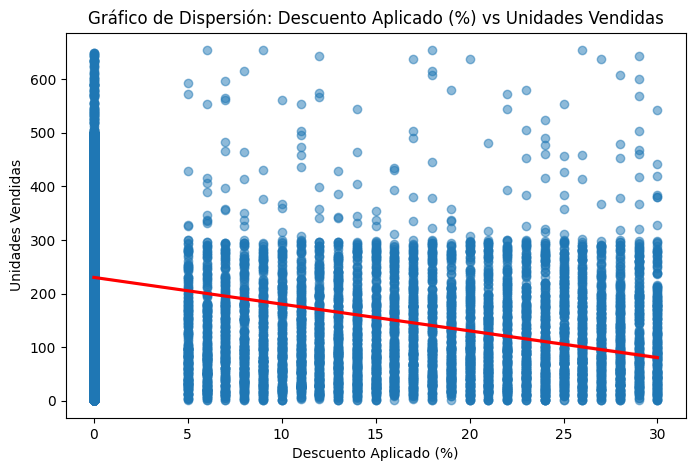

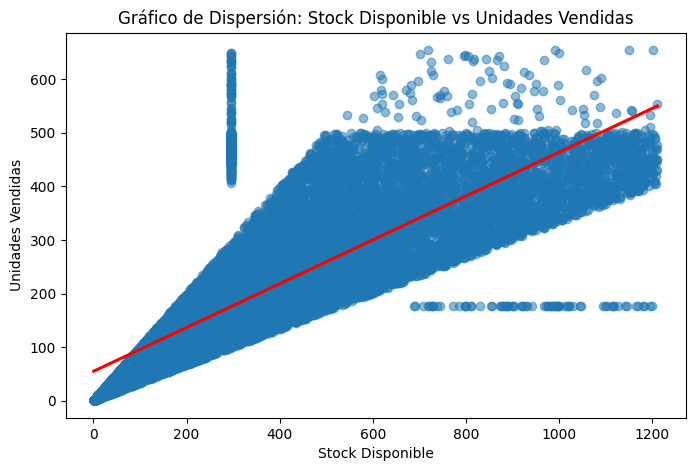

In [ ]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files



#   Excluir variables binarias
# Seleccionar solo variables numéricas que NO sean binarias (0 y 1)
numerical_df = df.select_dtypes(include=['number'])
binary_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() == 2]
filtered_df = numerical_df.drop(columns=binary_columns)

# Generar Gráficos de Dispersión con Línea de Tendencia
target_variable = "Unidades Vendidas"  # Definir la variable objetivo

for col in filtered_df.columns:
    if col != target_variable:  # Evitar comparar la variable objetivo consigo misma
        plt.figure(figsize=(8, 5))
        sns.regplot(x=df[col], y=df[target_variable], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
        plt.title(f"Gráfico de Dispersión: {col} vs {target_variable}")
        plt.xlabel(col)
        plt.ylabel(target_variable)
        plt.show()


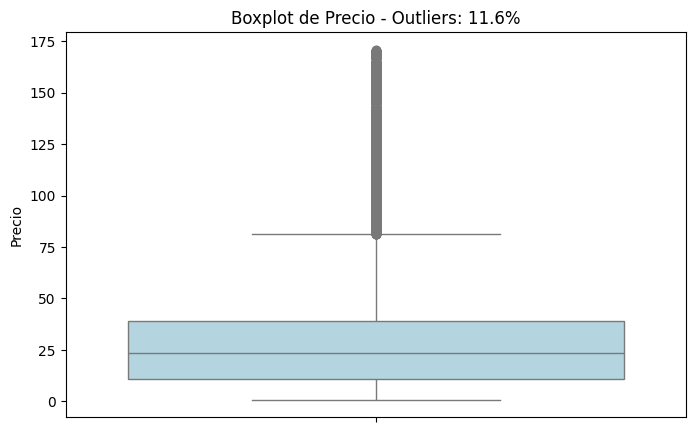

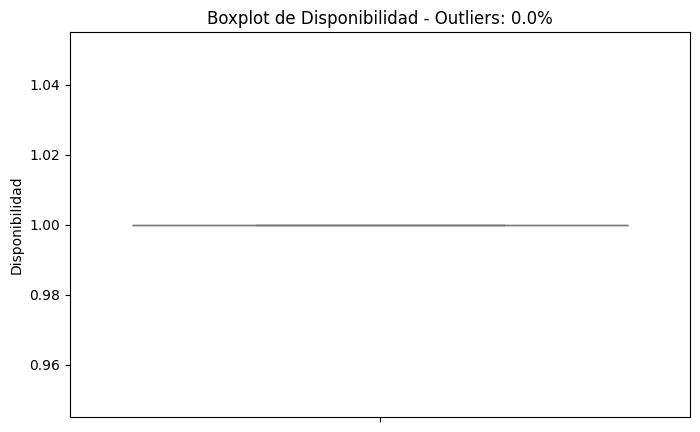

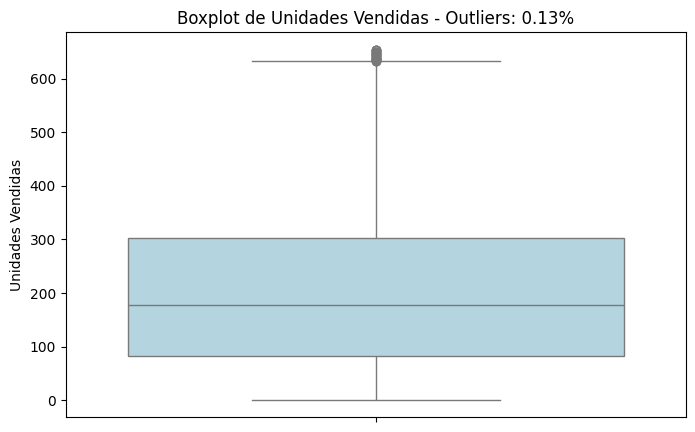

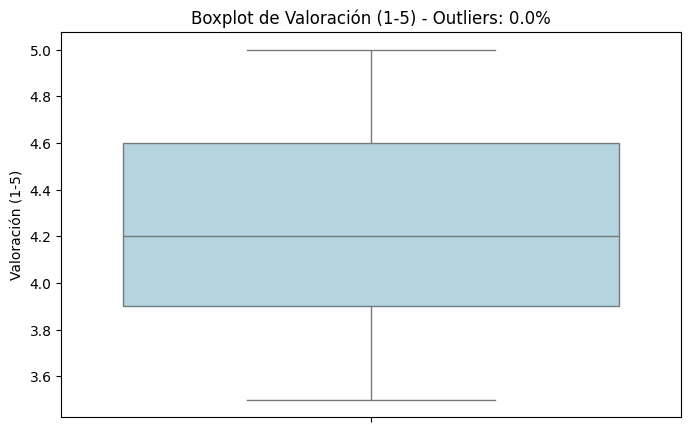

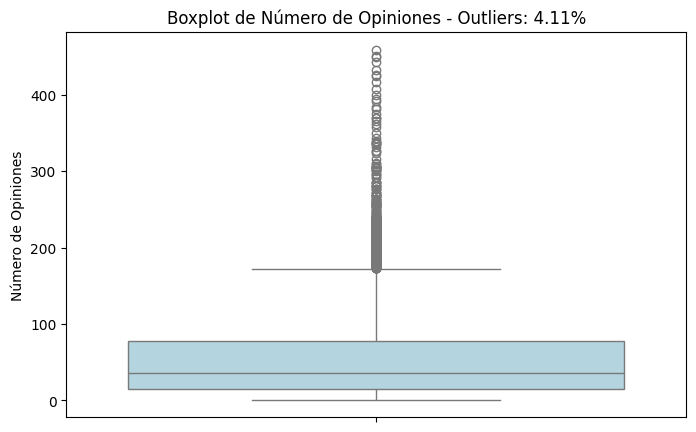

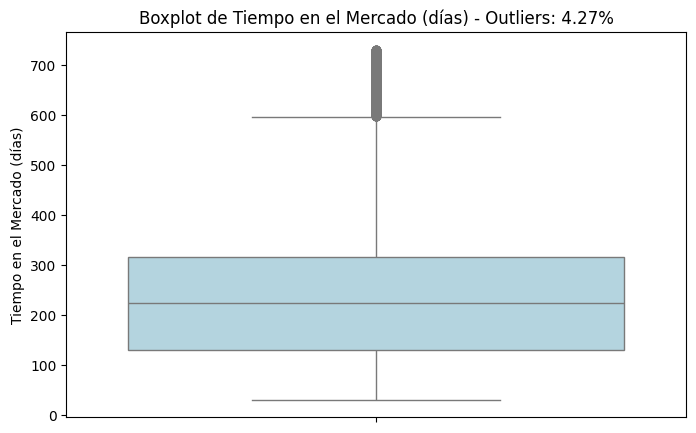

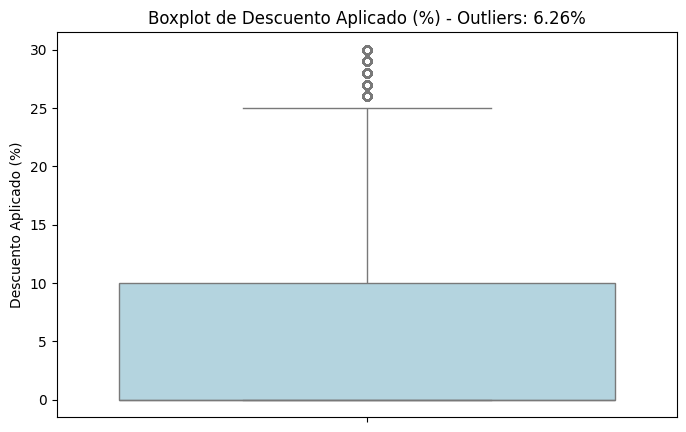

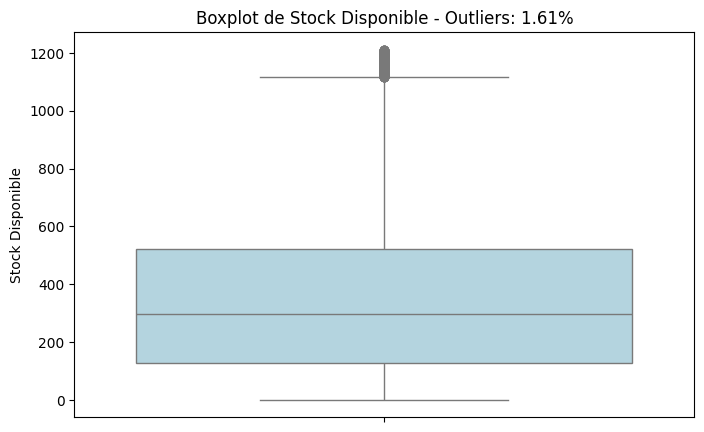

In [ ]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files



#   Excluir variables binarias
# Seleccionar solo variables numéricas que NO sean binarias (0 y 1)
numerical_df = df.select_dtypes(include=['number'])
binary_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() == 2]
filtered_df = numerical_df.drop(columns=binary_columns)

#   Función para calcular el porcentaje de outliers usando el método IQR
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return round((len(outliers) / len(series)) * 100, 2)  # Porcentaje de outliers

#   Calcular el porcentaje de outliers para cada variable numérica
outlier_percentages = {col: calculate_outlier_percentage(filtered_df[col]) for col in filtered_df.columns}

#  Generar Boxplots con porcentaje de outliers en el título
for col in filtered_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=filtered_df[col], color="lightblue")
    plt.title(f"Boxplot de {col} - Outliers: {outlier_percentages[col]}%")
    plt.ylabel(col)
    plt.show()


